# Assignment 4

### <span style="color:chocolate"> Submission requirements </span>

Your work will not be graded if your notebook doesn't include output. In other words, <span style="color:red"> make sure to rerun your notebook before submitting to Gradescope </span> (Note: if you are using Google Colab: go to Edit > Notebook Settings  and uncheck Omit code cell output when saving this notebook, otherwise the output is not printed).

Additional points may be deducted if these requirements are not met:
    
* Comment your code;
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own;
* Try and minimize the use of the global namespace (meaning, keep things inside functions).
---

### Import libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow import keras
from keras import metrics
from keras.datasets import fashion_mnist

tf.get_logger().setLevel('INFO')

---
### Step 1: Data ingestion

You'll train a binary classifier using the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset. This consists of 70,000 grayscale images (28x28). Each image is associated with 1 of 10 classes. The dataset was split by the creators; there are 60,000 training images and 10,000 test images. Note also that Tensorflow includes a growing [library of datasets](https://www.tensorflow.org/datasets/catalog/overview) and makes it easy to load them in numpy arrays.

In [2]:
# Load the Fashion MNIST dataset.
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

---
### Step 2: Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) and Data Preprocessing are often iterative processes that involve going back and forth to refine and improve the quality of data analysis and preparation. However, the specific order can vary depending on the project's requirements. In some cases, starting with EDA, as you see in this assignment, could be more useful, but there is no rigid rule dictating the sequence in all situations.

### <span style="color:chocolate">Exercise 1:</span> Getting to know your data (5 points)

Complete the following tasks:

1. Print the shapes and types of (X_train, Y_train) and (X_test, Y_test). Interpret the shapes (i.e., what do the numbers represent?). Hint: For types use the <span style="color:chocolate">type()</span> function.
2. Define a list of strings of class names corresponding to each class in (Y_train, Y_test). Call this list label_names. Hint: Refer to the Fashion MNIST documentation.

In [3]:
# YOUR CODE HERE
print('Shape of X_train:', X_train.shape)
print('Shape of Y_train:', Y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of Y_test:', Y_test.shape)

print('Type of X_train:', type(X_train))
print('Type of Y_train:', type(Y_train))
print('Type of X_test:', type(X_test))
print('Type of Y_test:', type(Y_test))
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Shape of X_train: (60000, 28, 28)
Shape of Y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of Y_test: (10000,)
Type of X_train: <class 'numpy.ndarray'>
Type of Y_train: <class 'numpy.ndarray'>
Type of X_test: <class 'numpy.ndarray'>
Type of Y_test: <class 'numpy.ndarray'>


### <span style="color:chocolate">Exercise 2:</span> Getting to know your data - cont'd (5 points)

Fashion MNIST images have one of 10 possible labels (shown above). 

Complete the following tasks:

1. Display the first 5 images in X_train for each class in Y_train, arranged in a 10x5 grid. Use the label_names list defined above;
2. Determine the minimum and maximum pixel values for images in the X_train dataset.

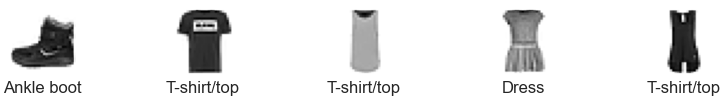

Minimum pixel value in X_train: 0
Maximum pixel value in X_train: 255


In [4]:
# YOUR CODE HERE
#The following code was modified from documentation to display 5 images:
plt.figure(figsize=(10,10))
for i in range(5): # Loop through the first 5 images
    plt.subplot(10,5,i+1)  # Create a subplot in a 10x5 grid at position i+1
    plt.xticks([]) # Remove x-axis ticks
    plt.yticks([]) # Remove y-axis ticks
    plt.grid(False) # Disable grid lines
    plt.imshow(X_train[i], cmap=plt.cm.binary)  # Display the image
    plt.xlabel(label_names[Y_train[i]]) #Retrieves the label for the i-th image from Y_train and uses it to set the x-axis label
plt.show()


min_pixel = np.min(X_train)
max_pixel = np.max(X_train)

print("Minimum pixel value in X_train:", min_pixel)
print("Maximum pixel value in X_train:", max_pixel)


---
### Step 3: Data preprocessing

This step is essential for preparing this image data in a format that is suitable for ML algorithms. 

### <span style="color:chocolate">Exercise 3:</span> Feature preprocessing (5 points)

In the previous lab, the input data had just a few features. Here, we treat **every pixel value as a separate feature**, so each input example has 28x28 (784) features!

In this exercise, you'll perform the following tasks:

1. Normalize the pixel values in both X_train and X_test data so they range between 0 and 1;
2. For each image in X_train and X_test, flatten the 2-D 28x28 pixel array to a 1-D array of size 784. Hint: use the <span style="color:chocolate">reshape()</span> method available in NumPy. Note that by doing so you will overwrite the original arrays;
3. Pint the shape of X_train and X_test arrays.

In [90]:
# YOUR CODE HERE
X_train = X_train/255.0
X_test  = X_test/255.0

#Reshape/flatten the datasets using NumPy's reshape method
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

#Print the shapes of the reshaped datasets
print('Shape of X_train after reshape:', X_train.shape)
print('Shape of X_test after reshape:', X_test.shape)

Shape of X_train after reshape: (60000, 784)
Shape of X_test after reshape: (10000, 784)


### <span style="color:chocolate">Exercise 4:</span> Label preprocessing (5 points)

This assignment involves binary classification. Specifically, the objective is to predict whether an image belongs to the sneaker class (class 7) or not.

Therefore, write code so that for each example in (Y_train, Y_test), the outcome variable is represented as follows: 
* $y=1$, for sneaker class (positive examples), and
* $y=0$, for non-sneaker class (negative examples).

Note: To avoid "ValueError: assignment destination is read-only", first create a copy of the (Y_train, Y_test) data and call the resulting arrays (Y_train, Y_test). Then overwrite the (Y_train, Y_test) arrays to create binary outcomes.

In [91]:
# Make copies of the original dataset for binary classification task.
#Y_train = np.copy(Y_train)
#Y_test = np.copy(Y_test)

# YOUR CODE HERE
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
# Make copies of the original dataset for binary classification task.
Y_train = np.copy(Y_train)
Y_test = np.copy(Y_test)

# Checking the unique class labels in the original datasets
print("Unique class labels in Y_train before conversion:", np.unique(Y_train))
print("Unique class labels in Y_test before conversion:", np.unique(Y_test))

# Converting labels to binary: y=1 for sneaker class (class 7), y=0 otherwise
Y_train = np.where(Y_train == 7, 1, 0)  # Positive examples (sneaker class)
Y_test = np.where(Y_test == 7, 1, 0)    # Positive examples (sneaker class)


# Checking the unique class labels in the datasets after conversion
print("Unique class labels in Y_train after conversion:", np.unique(Y_train))
print("Unique class labels in Y_test after conversion:", np.unique(Y_test))

# Checking the counts of positive and negative examples in the train and test set
print("Number of positive examples (sneaker class) in train set:", np.sum(Y_train == 1))
print("Number of negative examples (non-sneaker classes) in train set:", np.sum(Y_train == 0))

print("Number of positive examples (sneaker class) in test set:", np.sum(Y_test == 1))
print("Number of negative examples (non-sneaker classes) in test set:", np.sum(Y_test == 0))

Unique class labels in Y_train before conversion: [0 1 2 3 4 5 6 7 8 9]
Unique class labels in Y_test before conversion: [0 1 2 3 4 5 6 7 8 9]
Unique class labels in Y_train after conversion: [0 1]
Unique class labels in Y_test after conversion: [0 1]
Number of positive examples (sneaker class) in train set: 6000
Number of negative examples (non-sneaker classes) in train set: 54000
Number of positive examples (sneaker class) in test set: 1000
Number of negative examples (non-sneaker classes) in test set: 9000


### <span style="color:chocolate">Exercise 5:</span> Data splits (10 points)

Using the <span style="color:chocolate">train_test_split()</span> method available in scikit-learn:
1. Retain 20% from the training data for validation purposes. Set random state to 1234. Name the resulting dataframes as follows: X_train_mini, X_val, Y_train_mini, Y_val.
2. Print the shape of each array.

In [92]:
# YOUR CODE HERE

X_train_mini, X_val, Y_train_mini, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=1234)

#Print the shapes of each array
print('Shape of X_train_mini:', X_train_mini.shape)
print('Shape of X_val:', X_val.shape)
print('Shape of Y_train_mini:', Y_train_mini.shape)
print('Shape of Y_val:', Y_val.shape)

Shape of X_train_mini: (48000, 28, 28)
Shape of X_val: (12000, 28, 28)
Shape of Y_train_mini: (48000,)
Shape of Y_val: (12000,)


### <span style="color:chocolate">Exercise 6:</span> Data shuffling (10 points)

Since you'll be using Batch Gradient Descent (BGD) for training, it is important that **each batch is a random sample of the data** so that the gradient computed is representative. 

1. Use [integer array indexing](https://numpy.org/doc/stable/reference/arrays.indexing.html#integer-array-indexing) to re-order (X_train_mini, Y_train_mini) using a list of shuffled indices. In doing so, you will overwrite the arrays.

In [93]:
np.random.seed(0)
# YOUR CODE HERE

shuffled_indices = np.random.permutation(range(len(Y_train_mini)))
X_train_mini = X_train_mini[shuffled_indices]
Y_train_mini = Y_train_mini[shuffled_indices]

print(Y_train_mini.shape)



(48000,)


---
### Step 4: Exploratory Data Analysis (EDA) - cont'd

Before delving into model training, let's further explore the raw feature values by comparing sneaker and non-sneaker training images.

### <span style="color:chocolate">Exercise 7:</span> Pixel distributions (10 points)

1. Identify all sneaker images in X_train_mini and calculate the mean pixel value for each sneaker image. Visualize these pixel values using a histogram. Print the mean pixel value across all sneaker images.
2. Identify all non-sneaker images in X_train_mini and calculate the mean pixel value for each non-sneaker image. Visualize these pixel values using a histogram. Print the mean pixel value across all non-sneaker images.
3. Based on the histogram results, assess whether there is any evidence suggesting that pixel values can be utilized to distinguish between sneaker and non-sneaker images. Justify your response.

Notes: Make sure to provide a descriptive title and axis labels for each histogran. Make sure you utilize Y_train_mini to locate the sneaker and non-sneaker class.

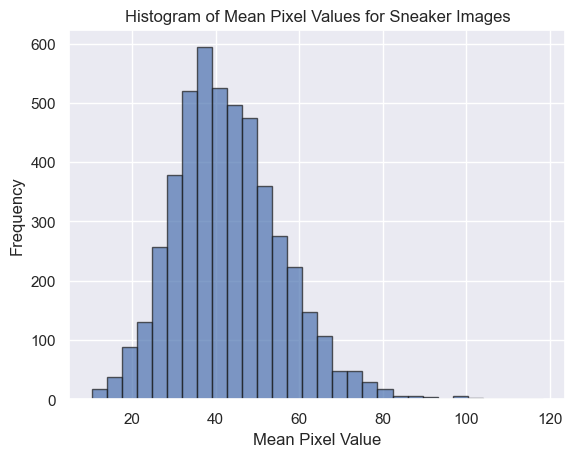

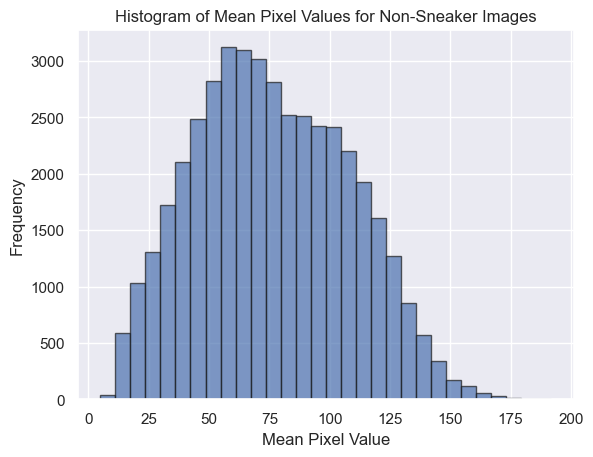

'The mean pixel values for each sneaker image is distinctly different from those of non-sneaker images as their\nwhich means that there is significant difference in mean values between sneaker and non-sneaker images. So, \npixel values can be utilized to distinguish between the two classes.'

In [94]:
# YOUR CODE HERE
# Identifing sneaker images
sneaker_indices = np.where(Y_train_mini == 1)[0]
sneaker_images = X_train_mini[sneaker_indices]

# Calculate mean pixel values for each sneaker image
mean_pixel_sneaker = np.mean(sneaker_images, axis=(1, 2))

plt.hist(mean_pixel_sneaker,bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Mean Pixel Values for Sneaker Images')
plt.xlabel('Mean Pixel Value')
plt.ylabel('Frequency')
plt.show()

#identifying non-sneaker images
non_sneaker_indices = np.where(Y_train_mini == 0)[0]
non_sneaker_images = X_train_mini[non_sneaker_indices]

# Calculating mean pixel values for each non-sneaker image
mean_pixel_non_sneaker = np.mean(non_sneaker_images, axis=(1, 2))

plt.hist(mean_pixel_non_sneaker,bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Mean Pixel Values for Non-Sneaker Images')
plt.xlabel('Mean Pixel Value')
plt.ylabel('Frequency')
plt.show()

'''The mean pixel values for each sneaker image is distinctly different from those of non-sneaker images as their
which means that there is significant difference in mean values between sneaker and non-sneaker images. So, 
pixel values can be utilized to distinguish between the two classes.'''



---
### Step 4: Modeling

### <span style="color:chocolate">Exercise 8:</span> Baseline model (10 points)

When dealing with classification problems, a simple baseline is to select the *majority* class (the most common label in the training set) and use it as the prediction for all inputs.

With this information in mind:

1. What is the number of sneaker images in Y_train_mini?
2. What is the number of non-sneaker images in Y_train_mini?
3. What is the majority class in Y_train_mini?
4. What is the accuracy of a majority class classifier for Y_train_mini?
5. Implement a function that computes the Log Loss (binary cross-entropy) metric and use it to evaluate this baseline on both the mini train (Y_train_mini) and validation (Y_val) data. Use 0.1 as the predicted probability for your baseline (reflecting what we know about the original distribution of classes in the mini training data). Hint: for additional help, see the file ``04 Logistic Regression with Tensorflow_helpers.ipynb``.

In [122]:
# YOUR CODE HERE

num_sneakers = np.sum(Y_train_mini == 1)
num_non_sneakers = np.sum(Y_train_mini == 0)
print('Number of sneaker images in Y_train_mini:', num_sneakers)
print('Number of non-sneaker images in Y_train_mini:', num_non_sneakers)

'''Non-sneaker class is the majority in Y_train_mini'''

#Calculating the accuracy of the majority class
accuracy_majority_class = num_non_sneakers/(num_non_sneakers+num_sneakers)

#Printing the accuracy
print("Accuracy of the majority class for Y_train_mini:", accuracy_majority_class)



def softmax(z):
    #Subtracting the maximum value from each row of z for numerical stability
    z -= np.max(z, axis=1, keepdims=True)
    
    # Computing the exponentials of the adjusted values
    exps = np.exp(z)
    
    #Normalizing the exponentials
    row_sums = np.sum(exps, axis=1, keepdims=True)
    probs = exps / row_sums
    
    return probs



def ce_loss(preds, Y):
    m = Y.shape[0]
    cross_entropy_values = - np.sum(Y * np.log(preds), axis=1)
    loss = np.sum(cross_entropy_values) / m
    return loss

# Reshape X_train_mini
X_train_mini_flat = X_train_mini.reshape(X_train_mini.shape[0], -1)

#Computing predictions for training data
W = np.ones((X_train_mini_flat.shape[1], 2))  # Weight matrix for two output classes
preds = softmax(np.dot(X_train_mini_flat, W))

#Converting true labels to one-hot encoding
Y_train_mini_onehot = np.eye(2)[Y_train_mini]

#Computing cross-entropy loss
loss_train_mini = ce_loss(preds, Y_train_mini_onehot)
print("Cross-entropy loss in mini train data set:", loss_train_mini)



#Reshaping X_train_mini
X_val_flat = X_val.reshape(X_val.shape[0], -1)
W_val = np.ones((X_val_flat.shape[1], 2))  # Weight matrix for two output classes
preds_val = softmax(np.dot(X_val_flat, W_val))

#Converting true labels to one-hot encoding
Y_val_onehot = np.eye(2)[Y_val]

# Computing cross-entropy loss
loss_val = ce_loss(preds_val, Y_val_onehot)
print("Cross-entropy loss in Y_val data set:", loss_val)



Number of sneaker images in Y_train_mini: 4800
Number of non-sneaker images in Y_train_mini: 43200
Accuracy of the majority class for Y_train_mini: 0.9
Cross-entropy loss in mini train data set: 0.6931471805599454
Cross-entropy loss in Y_val data set: 0.6931471805599452


### <span style="color:chocolate">Exercise 9:</span> Improvement over Baseline with TensorFlow (10 points)

Let's use TensorFlow to train a binary logistic regression model much like you did in the previous assignment. The goal here is to build a ML model to improve over the baseline classifier.

1. Fill in the <span style="color:green">NotImplemented</span> parts of the build_model() function below by following the instructions provided as comments. Hint: the activation function, the loss, and the evaluation metric are different compared to the linear regression model;
2. Build and compile a model using the build_model() function and the (X_train_mini, Y_train_mini) data. Set learning_rate = 0.0001. Call the resulting object *model_tf*.
3. Train *model_tf* using the (X_train_mini, Y_train_mini) data. Set num_epochs = 5 and batch_size=32. Pass the (X_val, Y_val) data for validation. Hint: see the documentation behind the [tf.keras.Model.fit()](https://bcourses.berkeley.edu/courses/1534588/files/88733489?module_item_id=17073646) method.
3. Generate a plot (for the mini training and validation data) with the loss values on the y-axis and the epoch number on the x-axis for visualization. Make sure to include axes name and title. Hint: check what the [tf.keras.Model.fit()](https://bcourses.berkeley.edu/courses/1534588/files/88733489?module_item_id=17073646) method returns.

In [96]:
def build_model(num_features, learning_rate):
  """Build a TF linear regression model using Keras.

  Args:
    num_features: The number of input features.
    learning_rate: The desired learning rate for SGD.

  Returns:
    model: A tf.keras model (graph).
  """
  # This is not strictly necessary, but each time you build a model, TF adds
  # new nodes (rather than overwriting), so the colab session can end up
  # storing lots of copies of the graph when you only care about the most
  # recent. Also, as there is some randomness built into training with SGD,
  # setting a random seed ensures that results are the same on each identical
  # training run.
  tf.keras.backend.clear_session()
  tf.random.set_seed(0)

  # Build a model using keras.Sequential. While this is intended for neural
  # networks (which may have multiple layers), we want just a single layer for
  # binary logistic regression.
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(
      units= 1,        # output dim
      input_shape= (num_features,),  # input dim
      use_bias=True,               # use a bias (intercept) param
      activation='softmax',
      kernel_initializer= tf.ones_initializer,  # initialize params to 1
      bias_initializer= tf.ones_initializer,    # initialize bias to 1
  ))

  # We need to choose an optimizer. We'll use SGD, which is actually mini-batch SGD
  optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

  # Finally, compile the model. Select the accuracy metric. This finalizes the graph for training.
  model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])
    
  return model


In [107]:
tf.random.set_seed(0)
# 2. Build and compile model
# YOUR CODE HERE

# Normalize the data
X_train_normal = X_train_mini / 255.0
X_val_normal = X_val / 255.0

# Flatten the input data
X_train_flat = X_train_normal.reshape(X_train_normal.shape[0], -1)
X_val_flat = X_val_normal.reshape(X_val_normal.shape[0], -1)

# Define the number of input features and learning rate
num_features = X_train_flat.shape[1]
learning_rate = 0.0001

model_tf = build_model(num_features, learning_rate)


# 3. Fit the model
# YOUR CODE HERE

# Get predictions for the current model
preds = model_tf.predict(X_train_flat)

# Fit the model
history = model_tf.fit(
    x=X_train_flat,
    y=Y_train_mini,
    epochs=5,
    batch_size=32,
    validation_data=(X_val_flat, Y_val),
    verbose=1)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 817us/step
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.1017 - loss: 208.5961 - val_accuracy: 0.1000 - val_loss: 199.9825
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1017 - loss: 196.0804 - val_accuracy: 0.1000 - val_loss: 187.4252
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1017 - loss: 183.5648 - val_accuracy: 0.1000 - val_loss: 174.8680
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1017 - loss: 171.0492 - val_accuracy: 0.1000 - val_loss: 162.3107
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1017 - loss: 158.5334 - val_accuracy: 0.1000 - val_loss: 149.7533


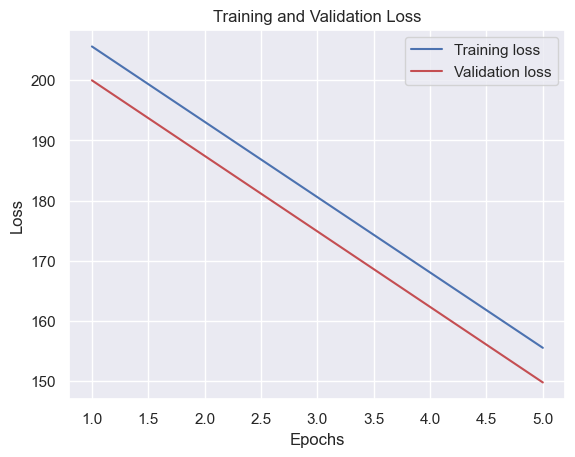

In [109]:
# 4. Generate a plot

# Getting loss values for training and validation sets
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Creating x-axis values (epochs)
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


---
### Step 5: Hyperparameter tuning

Hyperparameter tuning is a crucial step in optimizing ML models. It involves systematically adjusting hyperparameters such as learning rate, number of epochs, and optimizer to find the model configuration that leads to the best generalization performance.

This tuning process is typically conducted by monitoring the model's performance on the validation vs. training set. It's important to note that using the test set for hyperparameter tuning can compromise the integrity of the evaluation process by violating the assumption of "blindness" of the test data.

### <span style="color:chocolate">Exercise 10:</span> Hyperparameter tuning (10 points)

1. Fine-tune the hyperparameters of *model_tf* to determine the setup that yields the most optimal performance. Feel free to explore various values for the hyperparameters. Hint: ask your instructors and TAs for help if in doubt.

After identifying your preferred model configuration, print the following information:

2. The first five learned parameters of the model (this should include the bias term);
3. The loss at the final epoch on both the mini training and validation datasets;
4. The percentage difference between the losses observed on the mini training and validation datasets.
5. Compare the training/validation loss of the TensorFlow model (model_tf) with the baseline model's loss. Does the TensorFlow model demonstrate an improvement over the baseline model?


Please note that we will consider 'optimal model configuration' any last-epoch loss that is below 0.08.

In [118]:
# YOUR CODE HERE
# Define a function to build and compile the model with customizable hyperparameters
def build_and_compile_model(num_features, learning_rate):
    model = build_model(num_features, learning_rate)
    return model

# Define a function to train the model with customizable hyperparameters
def train_model(model, X_train, Y_train, X_val, Y_val, num_epochs, batch_size):
    history = model.fit(
        x=X_train,
        y=Y_train,
        epochs=num_epochs,
        batch_size=batch_size,
        validation_data=(X_val, Y_val),
        verbose=0  # Set verbose to 0 for no output during training
    )
    return history

# Define hyperparameters to explore
learning_rates = [0.01]  
num_epochs = 20  
batch_sizes = [64]  

best_model = None
best_loss_val = float('inf')

# Looping over hyperparameters
for lr in learning_rates:
    for batch_size in batch_sizes:
        # Build and compile the model
        model_tf = build_and_compile_model(num_features, lr)
        
        # Train the model
        history = train_model(model_tf, X_train_flat, Y_train_mini, X_val_flat, Y_val, num_epochs, batch_size)
        
        # Get the loss at the final epoch on both mini training and validation datasets
        loss_train_final = history.history['loss'][-1]
        loss_val_final = history.history['val_loss'][-1]
        
        # Print the losses for monitoring
        print(f'Learning rate: {lr}, Batch size: {batch_size}, Final training loss: {loss_train_final}, Final validation loss: {loss_val_final}')
        
        # Check if this model configuration yields the most optimal performance
        if loss_val_final < best_loss_val:
            best_loss_val = loss_val_final
            best_model = model_tf

# Printing  the first five learned parameters of the model
first_five_params = best_model.get_weights()[0][:5]
print("First five learned parameters of the model:")
print(first_five_params)

# Printing the loss at the final epoch on both the mini training and validation datasets
print(f"Loss at the final epoch on mini training dataset: {loss_train_final}")
print(f"Loss at the final epoch on validation dataset: {loss_val_final}")

# Compute the percentage difference between the losses observed on the mini training and validation datasets
percentage_difference = ((loss_train_final - loss_val_final) / loss_val_final) * 100
print(f"Percentage difference between losses on mini training and validation datasets: {percentage_difference}%")

# Comparing the training/validation loss of the TensorFlow model with the baseline model's loss
# Computing the baseline model's loss using ce_loss function
baseline_loss_train = ce_loss(preds, Y_train_mini)
baseline_loss_val = ce_loss(preds_val, Y_val_onehot)
print(f"Baseline model's loss on mini training dataset: {baseline_loss_train}")
print(f"Baseline model's loss on validation dataset: {baseline_loss_val}")

# Compare the losses
if loss_val_final < baseline_loss_val:
    print("The TensorFlow model demonstrates an improvement over the baseline model.")
else:
    print("The TensorFlow model does not demonstrate an improvement over the baseline model.")


Learning rate: 0.01, Batch size: 64, Final training loss: 0.12319072335958481, Final validation loss: 0.11906472593545914
First five learned parameters of the model:
[[0.9998646]
 [0.9995394]
 [0.9973158]
 [0.9906202]
 [0.9773853]]
Loss at the final epoch on mini training dataset: 0.12319072335958481
Loss at the final epoch on validation dataset: 0.11906472593545914
Percentage difference between losses on mini training and validation datasets: 3.4653398743488744%
Baseline model's loss on mini training dataset: 0.0
Baseline model's loss on validation dataset: 0.6931471805599452
The TensorFlow model demonstrates an improvement over the baseline model.


---
### Step 6: Evaluation and Generalization


Now that you've determined the optimal set of hyperparameters, it's time to evaluate your optimized model on the test data to gauge its performance in real-world scenarios, commonly known as inference.

### <span style="color:chocolate">Exercise 11:</span> Computing accuracy (10 points)

1. Calculate aggregate accuracy on both mini train and test datasets using a probability threshold of 0.5. Hint: You can utilize the <span style="color:chocolate">model.evaluate()</span> method provided by tf.keras. Note: Aggregate accuracy measures the overall correctness of the model across all classes in the dataset;

2. Does the model demonstrate strong aggregate generalization capabilities? Provide an explanation based on your accuracy observations.

In [124]:
# YOUR CODE HERE
# Define the hyperparameters
learning_rate = 0.001
batch_size = 64
num_epochs = 20

# Normalize the test data
X_test_normal = X_test / 255.0

# Flatten the input data
X_test_flat = X_test_normal.reshape(X_test_normal.shape[0], -1)


# Evaluating the model on mini train dataset
train_loss, train_accuracy = model_tf.evaluate(X_train_flat, Y_train_mini, verbose=0)
print("Aggregate accuracy on mini train dataset:", train_accuracy)

# Evaluating the model on test dataset
test_loss, test_accuracy = model_tf.evaluate(X_test_flat, Y_test, verbose=0)
print("Aggregate accuracy on test dataset:", test_accuracy)


Aggregate accuracy on mini train dataset: 0.10000000149011612
Aggregate accuracy on test dataset: 0.10000000149011612


----
### <span style="color:chocolate">Bonus question</span> (20 points)

Is it possible to enhance the prediction accuracy for the sneaker class by performing the following steps?

1. Implement data balancing techniques, such as oversampling or undersampling, to equalize the representation of both classes.
2. After balancing the data, retrain the model on the balanced dataset.
3. Evaluate the model's performance, particularly focusing on the accuracy achieved for the sneaker class.

Note: provide a separate notebook for the Bonus exercise. Name it ``04 Logistic Regression with Tensorflow_bonus``.